In [58]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [179]:
data = pd.read_csv(r'''C:\Users\maddh\Downloads\Reduced_Sample_Homework_Week6.csv''')
print(data.shape)
print(list(data.columns))

(450642, 27)
['chcscncr', 'chcocncr', 'smoke100', 'smokday2', 'stopsmk2', 'lastsmk2', 'usenow3', 'ecigaret', 'ecignow', 'alcday5', 'avedrnk2', 'drnk3ge5', 'maxdrnks', 'fruit2', 'fruitju2', 'fvgreen1', 'frenchf1', 'potatoe1', 'vegetab2', 'exerany2', 'exract11', 'exeroft1', 'exerhmm1', 'exract21', 'exeroft2', 'exerhmm2', 'strength']


In [64]:
data.groupby(['chcscncr']).mean()

,chcocncr,smoke100,smokday2,stopsmk2,lastsmk2,usenow3,ecigaret,ecignow,alcday5,avedrnk2,...,potatoe1,vegetab2,exerany2,exract11,exeroft1,exerhmm1,exract21,exeroft2,exerhmm2,strength
chcscncr,,,,,,,,,,,,,,,,,,,,,
0.0,1.928010,1.606985,2.397095,1.457323,6.668375,2.954374,1.850337,2.727257,523.485887,3.667386,...,293.336403,196.129067,1.294166,53.247526,142.577648,109.285693,64.131414,146.629398,122.354796,596.793474
1.0,1.787215,1.554433,2.677037,1.491726,6.972581,2.971959,1.932719,2.700909,515.770342,2.795345,...,280.711839,189.107242,1.277552,53.417223,145.206237,111.278261,63.373080,149.400167,130.141212,612.037434


In [182]:
data['chcscncr']=np.where(data['chcscncr']==2.,0.,data['chcscncr'])
data['chcscncr']=np.where(data['chcscncr']==7.,0.,data['chcscncr'])
data['chcscncr']=np.where(data['chcscncr']==9.,0.,data['chcscncr']) 
data['chcscncr']=np.where(data['chcscncr'].isnull(),0. ,data['chcscncr'] )

In [183]:
data['chcscncr'].unique()

array([0., 1.])

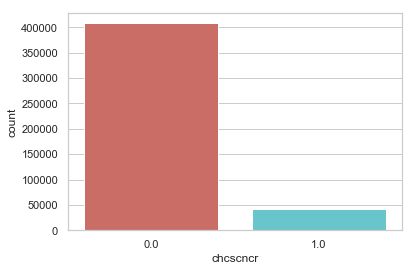

<Figure size 432x288 with 0 Axes>

In [67]:
sns.countplot(x='chcscncr', data=data, palette = 'hls')
plt.show()
plt.savefig('count_skin')

In [186]:
data=data.fillna(0.0).astype(int)
data['fruit2']=np.where(data['fruit2'].between(101,199),1,data['fruit2'])
data['fruit2']=np.where(data['fruit2'].between(201,299),1,data['fruit2'])
data['fruit2']=np.where(data['fruit2'] == 300,0,data['fruit2'])
data['fruit2']=np.where(data['fruit2'].between(301,399),0,data['fruit2'])
data['fruit2']=np.where(data['fruit2'] == 555,0,data['fruit2'])
data['fruit2']=np.where(data['fruit2'] == 777,0,data['fruit2'])
data['fruit2']=np.where(data['fruit2'] == 999,0,data['fruit2'])

In [187]:
data['fruit2'].unique()

array([1, 0], dtype=int64)

In [188]:
data['fruitju2']=np.where(data['fruitju2'].between(101,199),1,data['fruitju2'])
data['fruitju2']=np.where(data['fruitju2'].between(201,299),1,data['fruitju2'])
data['fruitju2']=np.where(data['fruitju2'] == 300,0,data['fruitju2'])
data['fruitju2']=np.where(data['fruitju2'].between(301,399),0,data['fruitju2'])
data['fruitju2']=np.where(data['fruitju2'] == 555,0,data['fruitju2'])
data['fruitju2']=np.where(data['fruitju2'] == 777,0,data['fruitju2'])
data['fruitju2']=np.where(data['fruitju2'] == 999,0,data['fruitju2'])

In [189]:
data['fruitju2'].unique()

array([0, 1], dtype=int64)

In [190]:
data['fvgreen1']=np.where(data['fvgreen1'].between(101,199),1,data['fvgreen1'])
data['fvgreen1']=np.where(data['fvgreen1'].between(201,299),1,data['fvgreen1'])
data['fvgreen1']=np.where(data['fvgreen1'] == 300,0,data['fvgreen1'])
data['fvgreen1']=np.where(data['fvgreen1'].between(301,399),0,data['fvgreen1'])
data['fvgreen1']=np.where(data['fvgreen1'] == 555,0,data['fvgreen1'])
data['fvgreen1']=np.where(data['fvgreen1'] == 777,0,data['fvgreen1'])
data['fvgreen1']=np.where(data['fvgreen1'] == 999,0,data['fvgreen1'])

In [191]:
data['potatoe1']=np.where(data['potatoe1'].between(101,199),1,data['potatoe1'])
data['potatoe1']=np.where(data['potatoe1'].between(201,299),1,data['potatoe1'])
data['potatoe1']=np.where(data['potatoe1'] == 300,0,data['potatoe1'])
data['potatoe1']=np.where(data['potatoe1'].between(301,399),0,data['potatoe1'])
data['potatoe1']=np.where(data['potatoe1'] == 555,0,data['potatoe1'])
data['potatoe1']=np.where(data['potatoe1'] == 777,0,data['potatoe1'])
data['potatoe1']=np.where(data['potatoe1'] == 999,0,data['potatoe1'])

In [192]:
data['vegetab2']=np.where(data['vegetab2'].between(101,299),1,0)

In [193]:
data['vegetab2'].unique()

array([1, 0], dtype=int64)

In [194]:
data['smokday2']=np.where(data['smokday2'].between(1,2),0,1)

In [195]:
data['smokday2'].unique()

array([1, 0], dtype=int64)

In [196]:
data['usenow3']=np.where(data['usenow3'].between(1,2),0,1)

In [197]:
data['ecignow']=np.where(data['ecignow'].between(1,2),0,1)

In [203]:
data['frenchf1']=np.where(data['frenchf1'].between(101,299),0,1)

In [204]:
data['drnk3ge5']=np.where(data['drnk3ge5'].between(1,76),0,1)

In [211]:
data['exerany2']=np.where(data['exerany2']== 1,1,0)

In [214]:
data.drop(['alcday5','exract11','exerhmm1','exract21','exeroft2','avedrnk2','maxdrnks','exerhmm2','exeroft1','strength','ecigaret','smoke100','chcocncr','stopsmk2','lastsmk2'],axis=1)

,chcscncr,smokday2,usenow3,ecignow,drnk3ge5,fruit2,fruitju2,fvgreen1,frenchf1,potatoe1,vegetab2,exerany2
0,0,1,1,1,1,1,0,1,1,1,1,1
1,0,1,1,1,1,1,0,1,1,0,1,1
2,0,1,1,1,1,1,0,1,1,0,1,0
3,1,1,1,1,1,0,0,0,1,0,0,0
4,0,1,1,1,1,1,1,1,1,1,0,0
5,0,0,1,1,1,0,0,1,1,1,1,1
6,0,1,1,1,1,0,1,0,1,0,1,0
7,0,1,1,1,1,1,0,1,1,1,1,1
8,0,1,1,1,1,0,0,0,1,0,0,0
9,0,1,1,1,1,1,1,1,1,0,1,1


In [220]:
X = data.loc[:, data.columns != 'chcscncr']
y = data.loc[:, data.columns == 'chcscncr']

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\maddh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [223]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [224]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[81562    14]
 [ 8549     4]]


In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95     81576
          1       0.22      0.00      0.00      8553

avg / total       0.84      0.90      0.86     90129



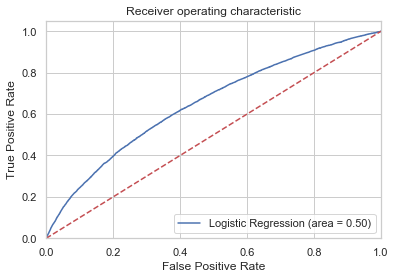

In [226]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()